In [1]:
from scipy.stats.qmc import Sobol
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
N = 200
z = np.random.randn(2,N)

m1 = np.array([0.95,0.95])
m2 = np.array([0.25,0.25])

C1 = np.array([[0.05,0.01],[0.01,0.05]])
L1 = np.linalg.cholesky(C1)
C2 = np.array([[0.01,0.0],[0.0,0.01]])
L2 = np.linalg.cholesky(C2)

x = np.zeros((2,N))
x[:,:int(N/2)] = m1[:,None]+L1.dot(z[:,:int(N/2)])
x[:,int(N/2):] = m2[:,None]+L2.dot(z[:,int(N/2):])

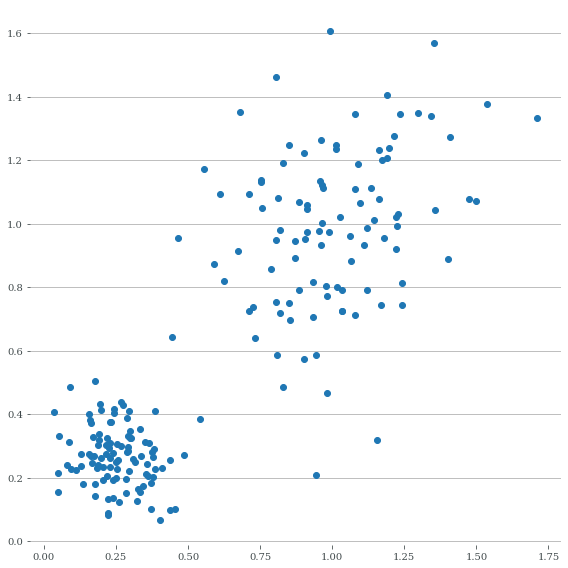

In [3]:
plt.figure(figsize=(8,8))
plt.plot(x[0],x[1], linestyle='', marker='o')
plt.show()

In [4]:
gmm = GaussianMixture(n_components=2)
gmm.fit(x.T)

GaussianMixture(n_components=2)

In [5]:
x_gmm = gmm.sample(N)[0]

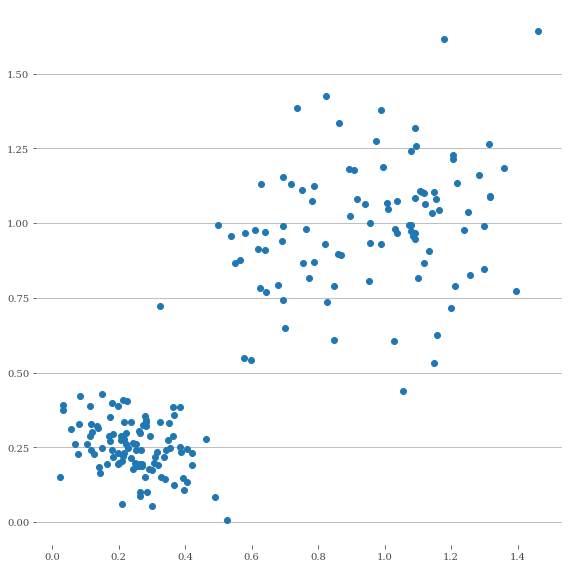

In [6]:
plt.figure(figsize=(8,8))
plt.plot(x_gmm[:,0],x_gmm[:,1],marker='o',linestyle='')
plt.show()

In [7]:
sampler = Sobol(3)

In [8]:
z = sampler.random(N)

/Users/gmaher/anaconda3/envs/laho/lib/python3.8/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


In [9]:
z.shape

(200, 3)

In [10]:
def uniform_to_categorical(u_param, n_categories):
    categories = (u_param*n_categories).astype(int)
    return categories

In [11]:
u1 = z[:,0]
u2 = z[:,1:]
cat = uniform_to_categorical(u1,2)

In [12]:
z1 = u2[cat==0]
z2 = u2[cat==1]

In [13]:
means = gmm.means_
covs = gmm.covariances_

In [14]:
x_sob = np.zeros((z.shape[0],2))
for i in range(z.shape[0]):
    k = cat[i]
    y = norm.ppf(u2[i])
    x_sob[i] = means[k] + np.linalg.cholesky(covs[k]).dot(y)


In [15]:
x_sob.shape

(200, 2)

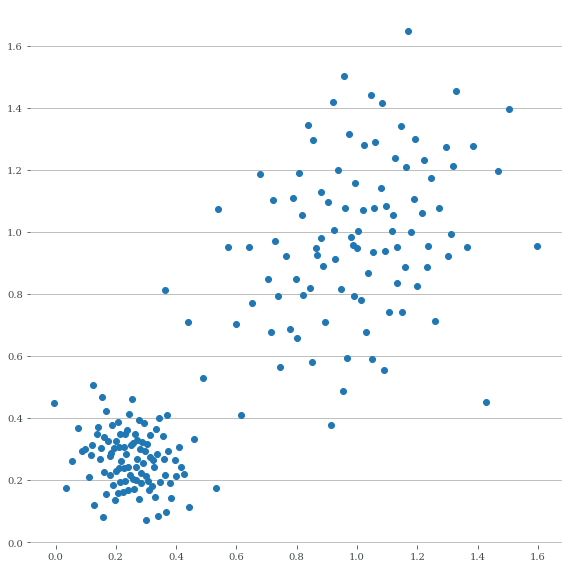

In [16]:
plt.figure(figsize=(8,8))
plt.plot(x_sob[:,0],x_sob[:,1],marker='o',linestyle='')
plt.show()